# 4. Cinemática do Corpo Rígido
Professor Paulo Victor <br>
E-mail: paulo.gomes@cefet-rj.br <br>
CEFET-RJ Campus Angra dos Reis Sala 6E

## 4.1 Introdução
* Tudo o que vimos em **Cinemática da Partícula** também vale para a **Cinemática de Corpos Rígidos**.
    - Queremos obter a posição, velocidade e aceleração de pontos pertencentes ao corpo
* Além disso, queremos também obter a orientação, velocidade angular e aceleração angular do corpo

**Corpo Rígido x Corpo Flexível**

Para analisar a cinemática de um corpo rígido, devemos criar um sistema de referência móvel associado ao corpo objeto de estudo. Através desse referencial móvel, poderemos estudar a mudança de orientação, a velocidade angular e a aceleração angular do corpo. 

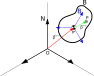

In [1]:
from IPython.display import SVG
SVG('batata02.svg')

## 4.2 Ângulos de Euler

Podemos representar qualquer orientação de um corpo rígido através de 3 rotações sucessivas. 

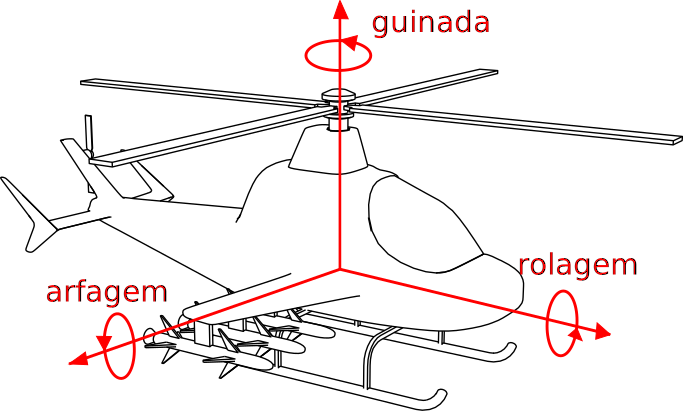

In [2]:
SVG('helicoptero-Euler-angs.svg')

In [3]:
from IPython.display import Video

In [4]:
Video('Helicoptero-Euler-Angs.m4v',width=700)

### Exemplo 1: 
Obtenha a orientação, velocidade angular e a aceleração angular do helicóptero. 

In [5]:
import sympy as sy
import sympy.physics.mechanics as me

In [6]:
SVG('angs_euler.svg')

In [7]:
theta,phi,gamma = me.dynamicsymbols('theta phi gamma')

In [8]:
N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')
C = me.ReferenceFrame('C')

In [9]:
A.orient(N,'Axis',[theta,N.x])
B.orient(A,'Axis',[phi,A.y])
C.orient(B,'Axis',[gamma,B.z])

**Orientação**

In [10]:
C.dcm(N)

Matrix([
[ cos(gamma(t))*cos(phi(t)),  sin(gamma(t))*cos(theta(t)) + sin(phi(t))*sin(theta(t))*cos(gamma(t)), sin(gamma(t))*sin(theta(t)) - sin(phi(t))*cos(gamma(t))*cos(theta(t))],
[-sin(gamma(t))*cos(phi(t)), -sin(gamma(t))*sin(phi(t))*sin(theta(t)) + cos(gamma(t))*cos(theta(t)), sin(gamma(t))*sin(phi(t))*cos(theta(t)) + sin(theta(t))*cos(gamma(t))],
[               sin(phi(t)),                                             -sin(theta(t))*cos(phi(t)),                                             cos(phi(t))*cos(theta(t))]])

**Velocidade Angular**

In [11]:
C.ang_vel_in(N)

theta'*N.x + phi'*A.y + gamma'*B.z

**Aceleração Angular**

In [12]:
C.ang_acc_in(N)

theta''*N.x + phi''*A.y + phi'*theta'*A.z + gamma'*phi'*B.x - cos(phi)*gamma'*theta'*B.y + gamma''*B.z

Queremos agora obter a velocidade e a aceleração do bico do helicóptero em relação ao referencial inercial. Vamos supor que a distância do bico ao centro de massa seja $L$.

In [13]:
x,y,z = me.dynamicsymbols('x y z')
L = sy.symbols('L')

In [14]:
O = me.Point('O')
O.set_vel(N,0)

In [15]:
P = me.Point('P')
pO_CO = x*N.x + y*N.y + z*N.z 
pPO = pO_CO + L*C.y
P.set_pos(O,pPO)
P.set_vel(N,pPO.dt(N))

In [16]:
P.vel(N)

x'*N.x + y'*N.y + z'*N.z - L*(sin(phi)*theta' + gamma')*C.x + L*(sin(gamma)*phi' + cos(gamma)*cos(phi)*theta')*C.z

In [17]:
P.acc(N)

x''*N.x + y''*N.y + z''*N.z + (L*(sin(gamma)*phi' + cos(gamma)*cos(phi)*theta')*(-sin(gamma)*cos(phi)*theta' + cos(gamma)*phi') - L*(sin(phi)*theta'' + cos(phi)*phi'*theta' + gamma''))*C.x + (-L*(sin(gamma)*phi' + cos(gamma)*cos(phi)*theta')**2 - L*(sin(phi)*theta' + gamma')**2)*C.y + (L*(sin(phi)*theta' + gamma')*(-sin(gamma)*cos(phi)*theta' + cos(gamma)*phi') + L*(-sin(gamma)*cos(phi)*gamma'*theta' + sin(gamma)*phi'' - sin(phi)*cos(gamma)*phi'*theta' + cos(gamma)*cos(phi)*theta'' + cos(gamma)*gamma'*phi'))*C.z

## 4.3 Restrições Cinemáticas

Em sistemas mecânicos, frequentemente os corpos (**elos**) do sistema são restringidos a se moverem de alguma forma específica para um dado fim. <br>
Chamamos o conjunto de **elos** do sistema mecânico de **cadeia cinemática**. Basicamente podemos ter:
* Cadeia cinemática aberta
* Cadeia cinemática fechada

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTPEwD5jd0h3y0qYiG5gw-456UmpzFMFq-odg&usqp=CAU)

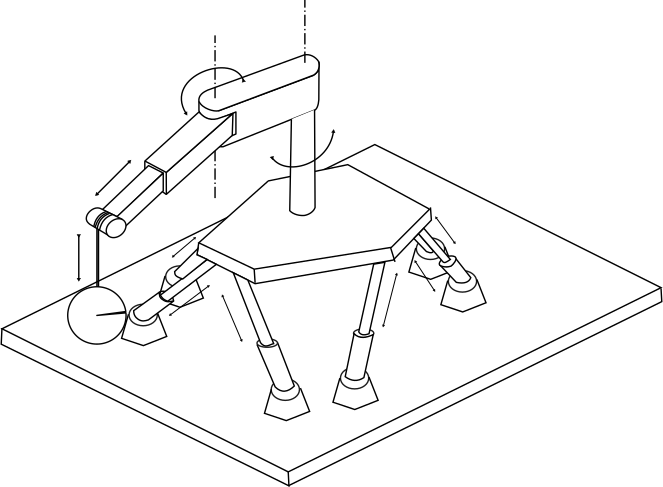

In [18]:
SVG('robo-pv.svg')

In [19]:
Video('Dinamica Do Hibrido-1.m4v',width=700)

### 4.3.1 Condição de não deslizamento

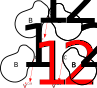

In [20]:
SVG('batata03.svg')

$$\vec{v}{}^{C/B_{1}} = \vec{v}{}^{C/B_{2}}$$

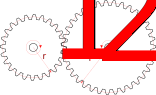

In [21]:
SVG('engrenagens.svg')

### Exemplo 2:

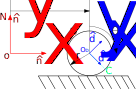

In [22]:
SVG('disco1.svg')

In [23]:
theta,x = me.dynamicsymbols('theta x')
r = sy.symbols('r')

In [24]:
N = me.ReferenceFrame('N')
D = me.ReferenceFrame('D')

In [25]:
D.orient(N,'Axis',[-theta,N.z])

In [26]:
D.ang_vel_in(N)

- theta'*N.z

In [27]:
D.ang_acc_in(N)

- theta''*N.z

In [28]:
pOdO = x*N.x
pCOd = r*D.x

In [29]:
pCO = pOdO + pCOd
pCO

x*N.x + r*D.x

In [30]:
velC = pCO.dt(N)
velC

x'*N.x - r*theta'*D.y

Quando $C$ é o ponto de contato do disco com o chão:
$$\hat{\mathbf{d}}_y = \hat{\mathbf{n}}_x$$
$$\theta = \dfrac{\pi}{2}$$
Neste instante de tempo, temos que:
$${}^{N}\vec{v} {}^{C} = \vec{0}$$

In [31]:
velC.express(N)

(-r*sin(theta)*theta' + x')*N.x - r*cos(theta)*theta'*N.y

In [32]:
dic = {theta:sy.pi/2}
Eq = me.msubs(velC.express(N),dic)
Eq

(-r*theta' + x')*N.x

In [33]:
Eqx = sy.Eq(Eq.dot(N.x),0)
Eqx

Eq(-r*Derivative(theta(t), t) + Derivative(x(t), t), 0)

In [34]:
xsol = sy.solve(Eqx,x.diff())[0]
xsol

r*Derivative(theta(t), t)

In [35]:
sy.Eq(x.diff(),xsol)

Eq(Derivative(x(t), t), r*Derivative(theta(t), t))

### 4.3.2 Equações de Restrições Cinemáticas ou Equações de Vínculos

A determinação da configuração do sistema pode ser feita através de um conjunto de funções escalares do tempo, $q_1(t)$, $q_2(t)$, ..., $q_n(t)$, denominadas **coordenadas generalizadas** ou, simplesmente, coordenadas do sistema.
* O número de coordenadas generalizadas mutuamente independentes de um sistema mecânico é conhecido como **número de graus de liberdade** do sistema.  
$$f(q_1,q_2,...,q_n,\dot{q}_1,\dot{q}_2,...,\dot{q}_n,t) = 0$$

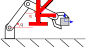

In [36]:
SVG('robo1.svg')

2 coordenadas generalizadas independentes

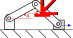

In [37]:
SVG('robo2.svg')

1 coordenada generalizada independente

### Exemplo 3:

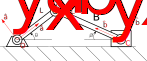

In [38]:
SVG('biela-manivela2.svg')

$${}^{N}\vec{\omega}{}^{A} = \dot{\theta} \hat{\mathbf{n}}_z \qquad {}^{N}\vec{\omega}{}^{B} = -\dot{\phi} \hat{\mathbf{n}}_z$$
Obter $\dot{\phi}(t)$:

In [39]:
theta,phi = me.dynamicsymbols('theta phi')
t = me.dynamicsymbols._t

In [40]:
la,lb = sy.symbols('la lb')

In [41]:
N = me.ReferenceFrame('N')
A = me.ReferenceFrame('A')
B = me.ReferenceFrame('B')

In [42]:
A.orient(N,'Axis',[theta,N.z])
B.orient(N,'Axis',[sy.pi/2-phi,N.z])

In [43]:
O = me.Point('O')
O.set_vel(N,0)

In [44]:
Q = me.Point('Q')
pQO = la*A.x
Q.set_pos(O,pQO)
Q.set_vel(N,pQO.dt(N))

In [45]:
C = me.Point('C')
pCQ = -lb*B.y
pCO = pQO + pCQ
C.set_pos(O, pCO)
C.set_vel(N,pCO.dt(N))
C.vel(N)

la*theta'*A.y - lb*phi'*B.x

In [46]:
x = sy.symbols('x')
Eq1 = (la*A.x - lb*B.y) - x*N.x
Eq1.express(N)

(la*cos(theta) + lb*cos(phi) - x)*N.x + (la*sin(theta) - lb*sin(phi))*N.y

In [47]:
phi_sol = sy.solve(Eq1.dot(N.y),phi)[0]
phi_sol

pi - asin(la*sin(theta(t))/lb)

In [48]:
phi_ponto_sol = phi_sol.diff(t)
phi_ponto_sol

-la*cos(theta(t))*Derivative(theta(t), t)/(lb*sqrt(-la**2*sin(theta(t))**2/lb**2 + 1))

Outra maneira de obter $\dot{\phi}$

In [49]:
EqR = sy.Eq(C.vel(N).dot(N.y),0)
EqR

Eq(la*cos(theta(t))*Derivative(theta(t), t) - lb*cos(phi(t))*Derivative(phi(t), t), 0)

In [50]:
phi_ponto = phi.diff(t)
sol_phi_ponto = sy.solve(EqR,phi_ponto)[0]
sol_phi_ponto

la*cos(theta(t))*Derivative(theta(t), t)/(lb*cos(phi(t)))

In [51]:
sol_phi_ponto.subs(phi,phi_sol)

-la*cos(theta(t))*Derivative(theta(t), t)/(lb*sqrt(-la**2*sin(theta(t))**2/lb**2 + 1))

Solução de $x$ em função de $\theta$:

In [52]:
C.pos_from(O).express(N)

(la*cos(theta) + lb*cos(phi))*N.x + (la*sin(theta) - lb*sin(phi))*N.y

In [53]:
x_sol = ((C.pos_from(O)).express(N)).subs(phi,phi_sol)
x_sol

(la*cos(theta) - lb*sqrt(-la**2*sin(theta)**2/lb**2 + 1))*N.x

Velocidade do ponto C:

In [54]:
v_C = x_sol.dt(N)
v_C

(la**2*sin(theta)*cos(theta)*theta'/(lb*sqrt(-la**2*sin(theta)**2/lb**2 + 1)) - la*sin(theta)*theta')*N.x

Aceleração do ponto C:

In [55]:
a_C = v_C.dt(N)
a_C

(la**4*sin(theta)**2*cos(theta)**2*theta'**2/(lb**3*(-la**2*sin(theta)**2/lb**2 + 1)**(3/2)) - la**2*sin(theta)**2*theta'**2/(lb*sqrt(-la**2*sin(theta)**2/lb**2 + 1)) + la**2*sin(theta)*cos(theta)*theta''/(lb*sqrt(-la**2*sin(theta)**2/lb**2 + 1)) + la**2*cos(theta)**2*theta'**2/(lb*sqrt(-la**2*sin(theta)**2/lb**2 + 1)) - la*sin(theta)*theta'' - la*cos(theta)*theta'**2)*N.x

[Voltar para o capítulo anterior](Din3.ipynb)     $\qquad$   [Avançar para o próximo capítulo](Din5.ipynb)